In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HR RAW DATA copy.csv", index_col= 0)

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'employeecount',
       'employeenumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NUMCOMPANIESWORKED',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TOTALWORKINGYEARS', 'TrainingTimesLastYear', 'WORKLIFEBALANCE',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YEARSWITHCURRMANAGER', 'SameAsMonthlyIncome', 'DateBirth', 'Salary',
       'RoleDepartament', 'NUMBERCHILDREN', 'RemoteWork'],
      dtype='object')

In [4]:
import re

# Ejemplo de DataFrame
lista= ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'employeecount',
       'employeenumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NUMCOMPANIESWORKED',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TOTALWORKINGYEARS', 'TrainingTimesLastYear', 'WORKLIFEBALANCE',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YEARSWITHCURRMANAGER', 'SameAsMonthlyIncome', 'DateBirth', 'Salary',
       'RoleDepartament', 'NUMBERCHILDREN', 'RemoteWork']
lista_excepcion= ['employeecount','employeenumber', 'NUMBERCHILDREN','WORKLIFEBALANCE',
                  'YEARSWITHCURRMANAGER','NUMCOMPANIESWORKED','TOTALWORKINGYEARS']
dicc_col = {}
dicc_excepcion ={}
# Aplica la función a la columna del DataFrame
for col in lista:
        cambio= re.sub(r'([a-z])([A-Z])', r'\1 \2', col)
        dicc_col[col]=cambio
for col in lista_excepcion:
        dicc_excepcion['YEARSWITHCURRMANAGER'] = 'Years With Curr Manager'
        dicc_excepcion['TOTALWORKINGYEARS'] = 'Total Working Years'
        dicc_excepcion['NUMCOMPANIESWORKED'] = 'Num Companies Worked'
        dicc_excepcion['NUMBERCHILDREN'] = "Number Children"
        dicc_excepcion['WORKLIFEBALANCE'] = "Work Life Balance"
        dicc_excepcion['employeenumber'] = "Employee Number"
        dicc_excepcion['employeecount'] = "Employee Count"
df.rename(columns =dicc_col, inplace=True)
df.rename(columns =dicc_excepcion, inplace=True)


In [5]:
df.columns

Index(['Age', 'Attrition', 'Business Travel', 'Daily Rate', 'Department',
       'Distance From Home', 'Education', 'Education Field', 'Employee Count',
       'Employee Number', 'Environment Satisfaction', 'Gender', 'Hourly Rate',
       'Job Involvement', 'Job Level', 'Job Role', 'Job Satisfaction',
       'Marital Status', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Over18', 'Over Time', 'Percent Salary Hike',
       'Performance Rating', 'Relationship Satisfaction', 'Standard Hours',
       'Stock Option Level', 'Total Working Years', 'Training Times Last Year',
       'Work Life Balance', 'Years At Company', 'Years In Current Role',
       'Years Since Last Promotion', 'Years With Curr Manager',
       'Same As Monthly Income', 'Date Birth', 'Salary', 'Role Departament',
       'Number Children', 'Remote Work'],
      dtype='object')

In [6]:
col_eliminar = ["Role Departament",
"Same As Monthly Income",
"Age",
"Employee Count",
"Salary", 
'Number Children', 'Years In Current Role', 'Standard Hours', 'Department', 'Over18']

def eliminar_columna(df,eliminar):
    return df.drop(eliminar, axis=1,inplace=True)

eliminar_columna(df,col_eliminar)


In [7]:
df.columns

Index(['Attrition', 'Business Travel', 'Daily Rate', 'Distance From Home',
       'Education', 'Education Field', 'Employee Number',
       'Environment Satisfaction', 'Gender', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Role', 'Job Satisfaction', 'Marital Status',
       'Monthly Income', 'Monthly Rate', 'Num Companies Worked', 'Over Time',
       'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Stock Option Level',
       'Total Working Years', 'Training Times Last Year', 'Work Life Balance',
       'Years At Company', 'Years Since Last Promotion',
       'Years With Curr Manager', 'Date Birth', 'Remote Work'],
      dtype='object')

Transformar columnas object en float, cambiando comas por puntos. 

In [8]:
columnas_object= [ 'Monthly Income', 'Daily Rate']


In [9]:
df[columnas_object].dtypes

Monthly Income    object
Daily Rate        object
dtype: object

In [10]:
df[columnas_object].head()

,Monthly Income,Daily Rate
0,"19537,0","684,0$"
1,"19999,0","699,0$"
2,"19232,0","532,0$"
3,"17169,0","359,0$"
4,NaN,"1319,0$"


In [11]:
def cambio_a_float(columna):
    try:
        # Reemplazar comas
        columna = columna.str.replace(',', '.')
        try: 
            #Reemplazar $ si existe
            columna = columna.str.replace('$', '', regex=False)
        except:
            columna
        # Convertir a float
        return columna.astype(float)
    except:
        return np.nan
 
   


In [12]:
df[columnas_object]=df[columnas_object].apply(cambio_a_float)

In [13]:
df[columnas_object].isna().sum()

Monthly Income    843
Daily Rate        124
dtype: int64

In [14]:
df[columnas_object].head()

,Monthly Income,Daily Rate
0,19537.0,684.0
1,19999.0,699.0
2,19232.0,532.0
3,17169.0,359.0
4,NaN,1319.0


Cambiar Hourly Rate a float

In [15]:
columna_hourly="Hourly Rate"

In [16]:
def cambio_hourly(cadena):
    
    try: 
        return float(cadena)
    except: 
        return np.nan

In [17]:
df["Hourly Rate"] = df["Hourly Rate"].apply(cambio_hourly)

In [18]:
df['Hourly Rate']

0        51.0
1        65.0
2        58.0
3        82.0
4        45.0
5        58.0
6        99.0
7        99.0
8        91.0
9        64.0
10       55.0
11       68.0
12       99.0
13       49.0
14       61.0
15       79.0
16       31.0
17       69.0
18       48.0
19       80.0
20       74.0
21       98.0
22       59.0
23       33.0
24       56.0
25       66.0
26       57.0
27       53.0
28       79.0
29       87.0
30       81.0
31       84.0
32       58.0
33       32.0
34       41.0
35       92.0
36       80.0
37       47.0
38       80.0
39       48.0
40       98.0
41       59.0
42        NaN
43       43.0
44       74.0
45       86.0
46       30.0
47       92.0
48       42.0
49       65.0
50       80.0
51       51.0
52       55.0
53       81.0
54       57.0
55       88.0
56       79.0
57       96.0
58       47.0
59       67.0
60       62.0
61       72.0
62       82.0
63        NaN
64        NaN
65       78.0
66       53.0
67       32.0
68       89.0
69       98.0
70       52.0
71    

In [19]:
df["Hourly Rate"].isna().sum()

84

In [20]:
df[columnas_object].isna().sum()

Monthly Income    843
Daily Rate        124
dtype: int64

Transformar columnas int64 en float.

In [21]:
def negativos(nombre_columna):

    if nombre_columna< 0: 
        return np.nan        

    else: 
        return float(nombre_columna)

df['Distance From Home']=df['Distance From Home'].apply(negativos)

In [22]:
df['Distance From Home'].isna().sum()

192

In [23]:
df['Distance From Home']

0        6.0
1        1.0
2        4.0
3        2.0
4        3.0
5       22.0
6       25.0
7        1.0
8        2.0
9        9.0
10       7.0
11      23.0
12      10.0
13      12.0
14      14.0
15       2.0
16       2.0
17       2.0
18       NaN
19      15.0
20       1.0
21       1.0
22       8.0
23       2.0
24       NaN
25       9.0
26       2.0
27       2.0
28      28.0
29      10.0
30       NaN
31      25.0
32       5.0
33       1.0
34       6.0
35       1.0
36      16.0
37       6.0
38      28.0
39       5.0
40       4.0
41       NaN
42       2.0
43      16.0
44       8.0
45       1.0
46       1.0
47      26.0
48       1.0
49       8.0
50       1.0
51       3.0
52      10.0
53       6.0
54       1.0
55      15.0
56       6.0
57       NaN
58       4.0
59       4.0
60       5.0
61      25.0
62       6.0
63       6.0
64      24.0
65       4.0
66      28.0
67      29.0
68       NaN
69       2.0
70       8.0
71      17.0
72       6.0
73       1.0
74      21.0
75       4.0
76       8.0

Transformación Employee Number

In [24]:
df.duplicated().sum()

0

In [25]:
df['Employee Number'].dtypes

dtype('O')

In [26]:
df['Employee Number'].value_counts()

482,0     2
530,0     2
507,0     2
517,0     2
522,0     2
523,0     2
525,0     2
526,0     2
544,0     2
501,0     2
725,0     2
724,0     2
722,0     2
721,0     2
717,0     2
710,0     2
502,0     2
495,0     2
747,0     2
440,0     2
734,0     2
733,0     2
728,0     2
423,0     2
424,0     2
433,0     2
447,0     2
1140,0    2
455,0     2
460,0     2
465,0     2
470,0     2
475,0     2
478,0     2
682,0     2
663,0     2
653,0     2
1069,0    2
389,0     2
388,0     2
381,0     2
376,0     2
1044,0    2
1053,0    2
1195,0    2
621,0     2
1185,0    2
1162,0    2
1161,0    2
1160,0    2
1157,0    2
1131,0    2
401,0     2
416,0     2
430,0     2
438,0     2
446,0     2
448,0     2
454,0     2
458,0     2
476,0     2
483,0     2
488,0     2
500,0     2
534,0     2
586,0     2
595,0     2
608,0     2
616,0     2
742,0     2
1135,0    2
762,0     2
1849,0    2
972,0     2
990,0     2
1927,0    2
1911,0    2
1898,0    2
1869,0    2
1821,0    2
966,0     2
1816,0    2
1804,0    2
1797

In [27]:
condicion1=df['Employee Number']=='722,0'

In [28]:
df[condicion1]

,Attrition,Business Travel,Daily Rate,Distance From Home,Education,Education Field,Employee Number,Environment Satisfaction,Gender,Hourly Rate,Job Involvement,Job Level,Job Role,Job Satisfaction,Marital Status,Monthly Income,Monthly Rate,Num Companies Worked,Over Time,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Stock Option Level,Total Working Years,Training Times Last Year,Work Life Balance,Years At Company,Years Since Last Promotion,Years With Curr Manager,Date Birth,Remote Work
338,No,NaN,929.0,10.0,3,Marketing,"722,0",4,0,55.0,3,2,salEs EXEcutIvE,4,NaN,5396.0,21703,1,NaN,12,"3,0",4,0,"10,0",2,"2,0",10,0,8,1991,Yes
1581,No,NaN,929.0,10.0,3,Marketing,"722,0",4,0,55.0,3,2,sAlES EXECUtivE,4,NaN,5396.0,21703,1,NaN,12,"3,0",4,0,"10,0",2,"2,0",10,0,8,1991,True


In [29]:
condicion2=df['Employee Number']=='586,0'

In [30]:
df[condicion2]

,Attrition,Business Travel,Daily Rate,Distance From Home,Education,Education Field,Employee Number,Environment Satisfaction,Gender,Hourly Rate,Job Involvement,Job Level,Job Role,Job Satisfaction,Marital Status,Monthly Income,Monthly Rate,Num Companies Worked,Over Time,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Stock Option Level,Total Working Years,Training Times Last Year,Work Life Balance,Years At Company,Years Since Last Promotion,Years With Curr Manager,Date Birth,Remote Work
323,No,travel_rarely,1276.0,16.0,3,Life Sciences,"586,0",4,0,72.0,3,3,heaLThcARe REpreSENTAtIVe,3,NaN,NaN,14295,4,Yes,12,"3,0",3,0,"10,0",2,"3,0",8,0,0,1988,False
1566,No,travel_rarely,1276.0,16.0,3,Life Sciences,"586,0",4,0,NaN,3,3,HEalTHCArE rEpresEnTaTIvE,3,NaN,NaN,14295,4,Yes,12,"3,0",3,0,"10,0",2,"3,0",8,0,0,1988,1


In [31]:
condicion3=df['Employee Number']=="1069,0"

In [32]:
df[condicion3]

,Attrition,Business Travel,Daily Rate,Distance From Home,Education,Education Field,Employee Number,Environment Satisfaction,Gender,Hourly Rate,Job Involvement,Job Level,Job Role,Job Satisfaction,Marital Status,Monthly Income,Monthly Rate,Num Companies Worked,Over Time,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Stock Option Level,Total Working Years,Training Times Last Year,Work Life Balance,Years At Company,Years Since Last Promotion,Years With Curr Manager,Date Birth,Remote Work
990,No,NaN,430.0,NaN,4,Medical,"1069,0",47,0,40.0,3,5,RESeArCH dIrEcTOR,4,NaN,NaN,21445,9,No,17,"3,0",4,2,"23,0",0,"3,0",2,2,2,1977,True
1486,No,NaN,430.0,1.0,4,Medical,"1069,0",4,0,40.0,3,5,rESEArCh DIrecTOR,4,NaN,NaN,21445,9,No,17,"3,0",4,2,"23,0",0,"3,0",2,2,2,1977,1


In [33]:
condicion4=df['Employee Number']=="1927,0"

In [34]:
df[condicion4]

,Attrition,Business Travel,Daily Rate,Distance From Home,Education,Education Field,Employee Number,Environment Satisfaction,Gender,Hourly Rate,Job Involvement,Job Level,Job Role,Job Satisfaction,Marital Status,Monthly Income,Monthly Rate,Num Companies Worked,Over Time,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Stock Option Level,Total Working Years,Training Times Last Year,Work Life Balance,Years At Company,Years Since Last Promotion,Years With Curr Manager,Date Birth,Remote Work
469,No,travel_frequently,NaN,1.0,2,Life Sciences,"1927,0",3,0,42.0,2,2,SaLeS ExECutiVe,4,Married,NaN,19255,1,NaN,12,"3,0",3,1,"7,0",2,"3,0",7,0,7,1995,True
1511,No,travel_frequently,NaN,1.0,2,Life Sciences,"1927,0",3,0,42.0,2,2,SALES EXEcutIve,4,Married,NaN,19255,1,NaN,12,"3,0",3,1,"7,0",2,"3,0",7,0,7,1995,Yes


In [35]:
condicion5=df['Employee Number']=="388,0"
df[condicion5]

,Attrition,Business Travel,Daily Rate,Distance From Home,Education,Education Field,Employee Number,Environment Satisfaction,Gender,Hourly Rate,Job Involvement,Job Level,Job Role,Job Satisfaction,Marital Status,Monthly Income,Monthly Rate,Num Companies Worked,Over Time,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Stock Option Level,Total Working Years,Training Times Last Year,Work Life Balance,Years At Company,Years Since Last Promotion,Years With Curr Manager,Date Birth,Remote Work
301,No,travel_frequently,442.0,2.0,2,NaN,"388,0",2,0,44.0,3,2,SaLES EXEcUtIVE,4,Single,NaN,20260,1,NaN,18,"3,0",1,0,NaN,3,NaN,10,0,9,1994,True
1544,No,travel_frequently,442.0,2.0,2,NaN,"388,0",2,0,44.0,3,2,sAlEs eXeCUTive,4,Single,NaN,20260,1,NaN,18,"3,0",1,0,NaN,3,NaN,10,0,9,1994,Yes


Limpiar mayusculas y minusculas de Job Role 

In [36]:
def job_role(cadena): 
    return cadena.title()

df['Job Role']=df['Job Role'].apply(job_role)

In [37]:
df['Job Role']

0                Research Director 
1                          Manager 
2                          Manager 
3                Research Director 
4                  Sales Executive 
5                          Manager 
6                  Sales Executive 
7                  Sales Executive 
8                          Manager 
9                Research Director 
10               Research Director 
11          Manufacturing Director 
12               Research Director 
13               Research Director 
14               Research Director 
15                         Manager 
16               Research Director 
17                         Manager 
18              Research Scientist 
19          Manufacturing Director 
20       Healthcare Representative 
21               Research Director 
22       Healthcare Representative 
23                         Manager 
24                 Sales Executive 
25          Manufacturing Director 
26                         Manager 
27          Manufacturing Di

Limpiar Total Working Years y Standard Hours (Los nulos tienen valor -1 con el fin de no alterar la muestra)

In [38]:
def convertir_float(elemento):
    if isinstance(elemento, str):
        elemento = elemento.replace(",", ".").replace("$", "")
        try:
            if elemento =="Not Available":
                return np.nan
            else:
                return float(elemento)
        except:
            return np.nan
    elif isinstance(elemento, (int, float)):
        return elemento
    else:
        return np.nan
for i in columnas_object:
    df[i]=df[i].apply(convertir_float)

In [39]:
lista_int=['Total Working Years', "Employee Number"]
for i in lista_int:
    df[i]=df[i].apply(convertir_float)

In [40]:
for columna in lista_int:
        df[columna] = pd.to_numeric(df[columna], errors='coerce', downcast='integer').astype('Int64')
    

In [41]:
df[lista_int].sample(9)

,Total Working Years,Employee Number
1148,4,1948
488,<NA>,199
561,10,<NA>
811,5,72
129,18,630
821,<NA>,<NA>
1142,<NA>,<NA>
923,<NA>,686
1597,24,809


In [42]:
df['Total Working Years'].value_counts()

10    144
8      86
6      84
9      69
5      66
7      56
4      54
1      53
12     34
3      32
13     30
14     30
11     29
15     28
16     28
20     28
18     27
21     23
17     22
2      21
22     18
19     17
24     14
23     13
28     13
26      8
0       8
25      6
33      6
36      6
29      6
37      5
27      5
31      4
30      3
32      3
35      3
40      3
34      2
38      1
Name: Total Working Years, dtype: Int64

Cambio de int64 a object mediante .map

In [43]:
def environment_satisfaction (cadena): 
    if cadena >4:
        return np.nan
    else:
        return cadena
        

In [44]:
df['Environment Satisfaction']=df['Environment Satisfaction'].apply(environment_satisfaction)


In [45]:
gender_dicc ={0: "Man" , 1: "Woman"}
job_involvement_dicc={1: "Not Very Involved", 2: "Not Involved", 3: "Involved", 4: "Very Involved"}
relation_job_satisfaction_dicc={1: "Very Dissatisfied", 2: "Dissatisfied", 3: "Satisfied", 4: "Very Satisfied"}
education_dicc={1:"Secondary School",2:"High School",3:"Bachelor",4:"Master/Double Degree",5:"PHD/MBA"}
remote_dicc={"0":"No", "1":"Yes", "True":"Yes", "False":"No", 'Yes':'Yes', 'No':'No'}
life_balance_dic={"1,0":"Very Unbalanced", "2,0":"Unbalanced", "3,0":"Balanced", "4,0":"Very Balanced"}
performance_rat_dic={"1,0": "Below Expectations", "2,0": "Meets Expectations", "3,0": "Exceeds Expectations", "4,0": "Excellent"}
travel_dicc={'travel_rarely':'Travel Rarely', 'travel_frequently':'Travel Frequently', 'non-travel':'Non Travel'}
marital_dicc={'divorced':'Divorced', 'Marreid':'Married', "Single":'Single', 'Divorced':'Divorced', 'Married':'Married'}

In [46]:
df['Performance Rating'].unique()

array(['3,0', '4,0', nan], dtype=object)

In [47]:
df["Gender"]=df["Gender"].map(gender_dicc, na_action= None)
df['Education']=df['Education'].map(education_dicc, na_action= None)
df['Job Involvement']=df['Job Involvement'].map(job_involvement_dicc, na_action= None)
df['Job Satisfaction']=df['Job Satisfaction'].map(relation_job_satisfaction_dicc, na_action= None)
df['Relationship Satisfaction']=df['Relationship Satisfaction'].map(relation_job_satisfaction_dicc, na_action= None)
df['Remote Work']=df['Remote Work'].map(remote_dicc, na_action=None)
df['Work Life Balance']=df['Work Life Balance'].map(life_balance_dic, na_action=None)
df['Performance Rating']=df['Performance Rating'].map(performance_rat_dic, na_action=None )
df['Environment Satisfaction']=df['Environment Satisfaction'].map(relation_job_satisfaction_dicc, na_action=None)
df['Business Travel']=df['Business Travel'].map(travel_dicc, na_action=None)
df['Marital Status']=df['Marital Status'].map(marital_dicc, na_action=None)

In [48]:
df.head(3)

,Attrition,Business Travel,Daily Rate,Distance From Home,Education,Education Field,Employee Number,Environment Satisfaction,Gender,Hourly Rate,Job Involvement,Job Level,Job Role,Job Satisfaction,Marital Status,Monthly Income,Monthly Rate,Num Companies Worked,Over Time,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Stock Option Level,Total Working Years,Training Times Last Year,Work Life Balance,Years At Company,Years Since Last Promotion,Years With Curr Manager,Date Birth,Remote Work
0,No,NaN,684.0,6.0,Bachelor,NaN,162,Very Dissatisfied,Man,51.0,Involved,5,Research Director,Satisfied,NaN,19537.0,6462,7,No,13,Exceeds Expectations,Satisfied,0,<NA>,5,Balanced,20,15,15,1972,Yes
1,No,NaN,699.0,1.0,Master/Double Degree,Life Sciences,259,Satisfied,Man,65.0,Not Involved,5,Manager,Satisfied,NaN,19999.0,5678,0,NaN,14,Exceeds Expectations,Very Dissatisfied,1,34,5,Balanced,33,11,9,1971,Yes
2,No,Travel Rarely,532.0,4.0,High School,Technical Degree,319,Satisfied,Man,58.0,Involved,5,Manager,Very Satisfied,Married,19232.0,4933,1,No,11,Exceeds Expectations,Very Satisfied,0,22,3,NaN,22,11,15,1981,Yes


In [49]:
df['Employee Number'].duplicated().sum()

534

Gestión de nulos: CATEGÓRICOS. Etiqueta Unknown

In [50]:
#Department, Bussiness Travel, Education Field, Over Time, Marital Status
lista_cat=['Business Travel', 'Education Field', 'Over Time', 'Marital Status']
for columna in lista_cat: 
    df[columna]=df[columna].fillna('Unknown')

In [51]:
df[lista_cat].isna().sum()

Business Travel    0
Education Field    0
Over Time          0
Marital Status     0
dtype: int64

Gestión de nulos categóricas. Sustitución por la moda

In [52]:
moda_=df['Performance Rating'].mode()
moda_

0    Exceeds Expectations
dtype: object

In [53]:
lista_cat2=['Performance Rating','Work Life Balance','Environment Satisfaction']

for columna in lista_cat2: 
    moda=df[columna].mode()[0]
    print(moda)
    df[columna]=df[columna].fillna(moda)

Exceeds Expectations
Balanced
Very Satisfied


In [54]:
df[lista_cat2].isna().sum()

Performance Rating          0
Work Life Balance           0
Environment Satisfaction    0
dtype: int64

In [55]:
df['Gender'].unique()

array(['Man', 'Woman'], dtype=object)

Gestión de nulos numéricas. Sustitución por la media porque son % bajos sin valores atitpicos

In [56]:
# Columnas con un % entre 5-10
df['Hourly Rate'].describe()

count    1530.000000
mean       66.028105
std        20.185954
min        30.000000
25%        48.000000
50%        66.000000
75%        84.000000
max       100.000000
Name: Hourly Rate, dtype: float64

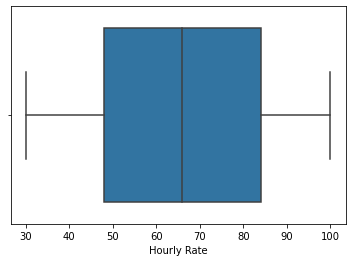

In [57]:
#Comprobamos outliers. No hay, les metemos la media.
sns.boxplot(x='Hourly Rate', data= df);

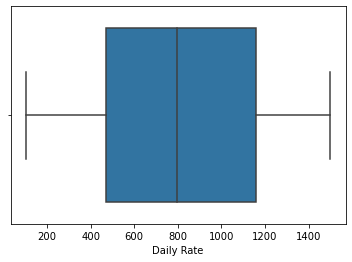

In [58]:
sns.boxplot(x='Daily Rate', data= df);

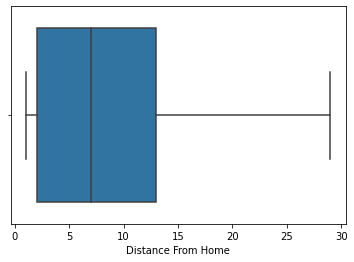

In [59]:
sns.boxplot(x='Distance From Home', data= df);

In [60]:
# la primera columna que gestionaremos sera 'Hourly Rate' usando el método 'fillna()' 
# calculamos la media para la columna 'Hourly Rate'
media_hr = df["Hourly Rate"].mean()
print(f"La media de la columna 'Hourly Rate' es: {round(media_hr, 2)}")

# aplicamos el método 'fillna()' a la columna
df["Hourly Rate"] = df["Hourly Rate"].fillna(media_hr)

# comprobamos los nulos para la columna
print(f"Después del 'fillna' tenemos {df['Hourly Rate'].isnull().sum()} nulos")

La media de la columna 'Hourly Rate' es: 66.03
Después del 'fillna' tenemos 0 nulos


In [61]:
# la primera columna que gestionaremos sera 'Daily Rate' usando el método 'fillna()' 
# calculamos la media para la columna 'Daily Rate'
media_dr = df["Daily Rate"].mean()
print(f"La media de la columna 'Daily Rate' es: {round(media_dr, 2)}")

# aplicamos el método 'fillna()' a la columna
df["Daily Rate"] = df["Daily Rate"].fillna(media_dr)

# comprobamos los nulos para la columna
print(f"Después del 'fillna' tenemos {df['Daily Rate'].isnull().sum()} nulos")

La media de la columna 'Daily Rate' es: 802.09
Después del 'fillna' tenemos 0 nulos


In [62]:
df['Distance From Home'].describe()

count    1422.000000
mean        8.892405
std         7.920281
min         1.000000
25%         2.000000
50%         7.000000
75%        13.000000
max        29.000000
Name: Distance From Home, dtype: float64

In [63]:
# la primera columna que gestionaremos sera 'Distance From Home' usando el método 'fillna()' 
# calculamos la media para la columna 'Distance From Home'
media_dfh = df["Distance From Home"].mean()
print(f"La media de la columna 'Distance From Home' es: {round(media_dfh, 2)}")

# aplicamos el método 'fillna()' a la columna
df["Distance From Home"] = df["Distance From Home"].fillna(media_dfh)

# comprobamos los nulos para la columna
print(f"Después del 'fillna' tenemos {df['Distance From Home'].isnull().sum()} nulos")

La media de la columna 'Distance From Home' es: 8.89
Después del 'fillna' tenemos 0 nulos


Gestión de nulos numéricas. Métodos iterative y knn

In [64]:
# columna Total working years 32% nulos
df['Total Working Years'].describe()

count    1088.000000
mean       11.318934
std         7.727675
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: Total Working Years, dtype: float64

In [65]:
df['Total Working Years'].isnull().sum()

526

In [66]:
df['Total Working Years'].value_counts()

10    144
8      86
6      84
9      69
5      66
7      56
4      54
1      53
12     34
3      32
13     30
14     30
11     29
15     28
16     28
20     28
18     27
21     23
17     22
2      21
22     18
19     17
24     14
23     13
28     13
26      8
0       8
25      6
33      6
36      6
29      6
37      5
27      5
31      4
30      3
32      3
35      3
40      3
34      2
38      1
Name: Total Working Years, dtype: Int64

(0.0, 45.0)

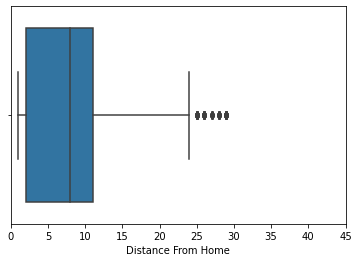

In [67]:
sns.boxplot(x='Distance From Home', data= df);
plt.xlim(0,45)

(0.0, 600.0)

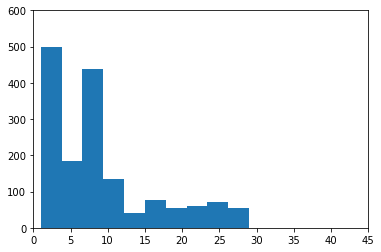

In [68]:
plt.hist(x='Distance From Home', data=df)
plt.xlim(0,45)
plt.ylim(0,600)

In [69]:
#hacemos una copia del df para comparar las columnas

In [110]:
df_copy = df.copy()

In [111]:
df_copy.columns

Index(['Attrition', 'Business Travel', 'Daily Rate', 'Distance From Home',
       'Education', 'Education Field', 'Employee Number',
       'Environment Satisfaction', 'Gender', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Role', 'Job Satisfaction', 'Marital Status',
       'Monthly Income', 'Monthly Rate', 'Num Companies Worked', 'Over Time',
       'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Stock Option Level',
       'Total Working Years', 'Training Times Last Year', 'Work Life Balance',
       'Years At Company', 'Years Since Last Promotion',
       'Years With Curr Manager', 'Date Birth', 'Remote Work'],
      dtype='object')

In [112]:
#KNN economicas
imputer = KNNImputer(n_neighbors=5)
df_copy_knn = imputer.fit_transform(df_copy[['Daily Rate', 'Monthly Rate', 'Hourly Rate', 'Monthly Income']])

In [113]:
df_copy[['DR_knn', 'MR_knn', 'HR_knn', 'mi_knn']]= df_copy_knn

In [114]:
#Iterative
# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 1000, random_state=42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copy[['Daily Rate', 'Monthly Rate', 'Hourly Rate', 'Monthly Income']])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

array([[  684.        ,  6462.        ,    51.        , 19537.        ],
       [  699.        ,  5678.        ,    65.        , 19999.        ],
       [  532.        ,  4933.        ,    58.        , 19232.        ],
       ...,
       [  903.        ,  2560.        ,    41.        ,  6305.46128304],
       [ 1229.        , 25952.        ,    84.        ,  6654.5268857 ],
       [  566.        , 24208.        ,    75.        , 10845.        ]])

In [115]:
df_copy[['DR_i', 'MR_i', 'HR_i','mi_iterative']]= imputer_iterative_imputado

In [116]:
df_copy.describe()[['Monthly Income', 'mi_knn', 'mi_iterative']]

,Monthly Income,mi_knn,mi_iterative
count,771.000000,1614.000000,1614.000000
mean,6477.686122,6480.040892,6480.629039
std,4766.119959,3659.930277,3293.901910
min,1009.000000,1009.000000,1009.000000
25%,2880.000000,4082.500000,5058.000000
50%,4859.000000,5641.800000,6421.800351
75%,8230.500000,7961.250000,6591.764872
max,19999.000000,19999.000000,19999.000000


In [117]:
#KNN años
imputer = KNNImputer(n_neighbors=5)
df_copy_knn_wy = imputer.fit_transform(df_copy[['Total Working Years', 'Date Birth', 'Num Companies Worked']])

In [118]:
df_copy[['twy_knn', 'db_knn', 'nc_knn']]= df_copy_knn_wy

In [119]:
#Iterative
# instanciamos las clases
imputer_iterative_wy = IterativeImputer(max_iter = 1000, random_state=42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado_wy = imputer_iterative.fit_transform(df_copy[['Total Working Years', 'Date Birth', 'Num Companies Worked']])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado_wy

array([[1.98136313e+01, 1.97200000e+03, 7.00000000e+00],
       [3.40000000e+01, 1.97100000e+03, 0.00000000e+00],
       [2.20000000e+01, 1.98100000e+03, 1.00000000e+00],
       ...,
       [9.00000000e+00, 1.98400000e+03, 0.00000000e+00],
       [1.20000000e+01, 1.98700000e+03, 4.00000000e+00],
       [1.68837116e+01, 1.97700000e+03, 6.00000000e+00]])

In [120]:
df_copy[['twy_i', 'db_i', 'ncw_i']]= imputer_iterative_imputado_wy

In [121]:
df_copy.describe()[['Total Working Years', 'twy_knn', 'twy_i']]

,Total Working Years,twy_knn,twy_i
count,1088.000000,1614.000000,1614.000000
mean,11.318934,11.216357,11.249215
std,7.727675,7.108639,6.958885
min,0.000000,0.000000,0.000000
25%,6.000000,6.000000,6.043282
50%,10.000000,10.000000,10.000000
75%,15.000000,15.000000,14.989760
max,40.000000,40.000000,40.000000


In [122]:
lista_copy_nulos = ['DR_knn',
       'MR_knn', 'HR_knn','DR_i', 'MR_i', 'HR_i', 'mi_iterative',
       'twy_knn', 'db_knn', 'nc_knn', 'db_i', 'ncw_i', 'Monthly Income', 'Total Working Years']
eliminar_columna(df_copy, lista_copy_nulos)

In [124]:
dicc_col_copy = {'twy_i': 'Total Working Years', 'mi_knn': 'Monthly Income'}
df_copy = df_copy.rename(columns= dicc_col_copy)


In [125]:
df_copy.columns

Index(['Attrition', 'Business Travel', 'Daily Rate', 'Distance From Home',
       'Education', 'Education Field', 'Employee Number',
       'Environment Satisfaction', 'Gender', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Role', 'Job Satisfaction', 'Marital Status',
       'Monthly Rate', 'Num Companies Worked', 'Over Time',
       'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Stock Option Level',
       'Training Times Last Year', 'Work Life Balance', 'Years At Company',
       'Years Since Last Promotion', 'Years With Curr Manager', 'Date Birth',
       'Remote Work', 'Monthly Income', 'Total Working Years'],
      dtype='object')

In [85]:
df['Job Satisfaction'].unique()

array(['Satisfied', 'Very Satisfied', 'Very Dissatisfied', 'Dissatisfied'],
      dtype=object)

In [86]:
df['Job Satisfaction'].value_counts()

Very Satisfied       514
Satisfied            481
Very Dissatisfied    317
Dissatisfied         302
Name: Job Satisfaction, dtype: int64

In [87]:
df['Job Satisfaction'].describe()

count               1614
unique                 4
top       Very Satisfied
freq                 514
Name: Job Satisfaction, dtype: object

In [88]:
df['Attrition'].value_counts()

No     1355
Yes     259
Name: Attrition, dtype: int64

# AB Testing

- H0= El nivel de satisfacción no está relacionado con la marcha de los empleados. 

- H1= El nivel de satisfactión está relacionado con la marcha de los empleados. 

- Grupo control= Los empleados con JS>=3.

- Grupo Test= Los empleados con JS<3.




In [89]:
df_ab=df_copy[['Attrition', 'Job Satisfaction']]

In [90]:
df_ab.head()

,Attrition,Job Satisfaction
0,No,Satisfied
1,No,Satisfied
2,No,Very Satisfied
3,No,Satisfied
4,No,Very Dissatisfied


In [91]:
#grupo control

grupo_control=df_ab[(df_ab['Job Satisfaction']=='Satisfied')|(df_ab['Job Satisfaction']=='Very Satisfied')]
grupo_control.head(5)



,Attrition,Job Satisfaction
0,No,Satisfied
1,No,Satisfied
2,No,Very Satisfied
3,No,Satisfied
5,No,Very Satisfied


In [92]:
len(grupo_control)

995

In [93]:
#grupo test

grupo_test=df_ab[(df_ab['Job Satisfaction']=='Very Dissatisfied')|(df_ab['Job Satisfaction']=='Dissatisfied')]
grupo_test.head(5)

,Attrition,Job Satisfaction
4,No,Very Dissatisfied
6,No,Very Dissatisfied
8,No,Very Dissatisfied
11,No,Dissatisfied
14,No,Dissatisfied


In [94]:
len(grupo_test)

619

In [95]:
#Tenemos que comprobar Attrition=Yes en cada uno de los grupos

base_control=grupo_control[grupo_control['Attrition']=='Yes'].count()[0]
base_control

136

In [96]:
control_yes=grupo_control[grupo_control['Attrition']=='Yes']
control_yes.describe()

,Attrition,Job Satisfaction
count,136,136
unique,1,2
top,Yes,Satisfied
freq,136,76


In [97]:
base_test=grupo_test[grupo_test['Attrition']=='Yes'].count()[0]
base_test

123

In [98]:
test_yes=grupo_test[grupo_test['Attrition']=='Yes']
test_yes.describe()

,Attrition,Job Satisfaction
count,123,123
unique,1,2
top,Yes,Very Dissatisfied
freq,123,70


In [99]:
tasa_rotacion_control= base_control / grupo_control['Attrition'].count() * 100
tasa_rotacion_control
#Un 8% de los empleados que están satisfechos o muy satisfechos se han marchado de la empresa

13.668341708542714

In [100]:
tasa_rotacion_test= base_test/ grupo_test['Attrition'].count() * 100
tasa_rotacion_test
#Un 7,5% de los empleados que están insatisfechos o muy insatisfechos se han marchado de la empresa

19.87075928917609

In [101]:
# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

### Prueba Chi-cuadrado

La prueba de Chi-cuadrado se utiliza para determinar si hay una asociación estadísticamente significativa entre dos variables categóricas.

In [102]:
# Crear la tabla de contingencia directamente
contingency_table = pd.crosstab(df_ab["Attrition"], df_ab["Job Satisfaction"])

# Realizar la prueba de Chi-cuadrado
chi2, p_value_chi2, _, _ = chi2_contingency(contingency_table)

# Imprimir los resultados de la prueba de Chi-cuadrado
print(f"Prueba de Chi-cuadrado - p-valor: {p_value_chi2}")




Prueba de Chi-cuadrado - p-valor: 0.0009401286438652477


hay evidencia para rechazar la hipótesis nula y que existe una asociación significativa entre las variables categóricas en tu estudio (en este caso, 'Attrition' y 'Job Satisfaction').

### Prueba t-student

In [103]:
grupo_control['Attrition'] = grupo_control['Attrition'].map({'Yes': 1, 'No': 0})
grupo_test['Attrition'] = grupo_test['Attrition'].map({'Yes': 1, 'No': 0})

# Calcular las tasas de rotación como porcentajes
tasa_rotacion_control = grupo_control['Attrition'].mean() * 100
tasa_rotacion_test = grupo_test['Attrition'].mean() * 100

In [104]:
tasa_rotacion_control = grupo_control['Attrition'].sum() / grupo_control['Attrition'].count()
# tasa_rotacion_test = grupo_test['Attrition'].mean() * 100
tasa_rotacion_control

0.13668341708542714

In [105]:
# Convertir la columna "Attrition" a valores numéricos (1 para "Yes", 0 para "No")
grupo_control['Attrition'] = grupo_control['Attrition'].map({'Yes': 1, 'No': 0})
grupo_test['Attrition'] = grupo_test['Attrition'].map({'Yes': 1, 'No': 0})

# Calcular las tasas de rotación como porcentajes
tasa_rotacion_control = grupo_control['Attrition'].mean() * 100
tasa_rotacion_test = grupo_test['Attrition'].mean() * 100

# Comparar las tasas de rotación con una prueba t de Student
t_stat, p_value_t = ttest_ind(grupo_control['Attrition'], grupo_test['Attrition'], equal_var=False)

# Imprimir las tasas de rotación y los resultados de la prueba t
print(f"Tasa de rotación en el Grupo Control: {tasa_rotacion_control}%")
print(f"Tasa de rotación en el Grupo Test: {tasa_rotacion_test}%")
print(f"Prueba t de Student - p-valor: {p_value_t}")

# Realizar un análisis de la diferencia de medias
diferencia_medias = grupo_control['Attrition'].mean() - grupo_test['Attrition'].mean()
print(f"Diferencia de medias: {diferencia_medias}")



Tasa de rotación en el Grupo Control: nan%
Tasa de rotación en el Grupo Test: nan%
Prueba t de Student - p-valor: nan
Diferencia de medias: nan


Los resultados indican lo siguiente:

Tasa de rotación en el Grupo Control: El 13.67% de los empleados en el Grupo de Control (satisfacción en el trabajo igual o superior a 3) dejaron la empresa.

Tasa de rotación en el Grupo Test: El 19.87% de los empleados en el Grupo de Test (satisfacción en el trabajo inferior a 3) dejaron la empresa.

Prueba t de Student - p-valor: El p-valor obtenido de la prueba t de Student es 0.0014. Este valor es menor que un umbral de significancia comúnmente utilizado como 0.05, lo que sugiere que hay evidencia estadística para rechazar la hipótesis nula de que no hay diferencia en las tasas de rotación entre los dos grupos.

Diferencia de medias: La diferencia de medias es -0.062, lo que sugiere que la tasa de rotación en el Grupo de Control es aproximadamente un 6.2% menor que en el Grupo de Test.

basándonos en estos resultados, podríamos concluir que hay una diferencia significativa en las tasas de rotación entre los empleados con diferentes niveles de satisfacción en el trabajo. Además, la dirección de la diferencia indica que los empleados con niveles de satisfacción más bajos tienen una tasa de rotación más alta en comparación con los empleados más satisfechos

### ¿Tienen sentido / son coherentes las dos pruebas entre sí?

Sí, hay una coherencia entre los resultados de la prueba de chi-cuadrado y la prueba t de Student, y ambos respaldan la idea de que hay una asociación significativa entre las variables que estás analizando (en este caso, 'Attrition' y 'Job Satisfaction').

En la prueba de t de Student, el p-valor es 0.0014253038367046356, que es menor que el nivel de significancia comúnmente utilizado de 0.05. Esto sugiere que hay evidencia significativa para rechazar la hipótesis nula de que no hay diferencia en las tasas de rotación entre los grupos de control y test.

En la prueba de chi-cuadrado, el p-valor es 0.0009401286438652477, que también es menor que 0.05. Esto indica que hay evidencia significativa para rechazar la hipótesis nula de que no hay relación entre las variables 'Attrition' y 'Job Satisfaction'.

Ambas pruebas proporcionan apoyo a la idea de que hay diferencias significativas en las tasas de rotación entre los grupos y que esta diferencia está asociada con los niveles de satisfacción en el trabajo.

### INSERCCIÓN DE DATOS EN SQL

In [106]:
df_copy.columns

Index(['Attrition', 'Business Travel', 'Daily Rate', 'Distance From Home',
       'Education', 'Education Field', 'Employee Number',
       'Environment Satisfaction', 'Gender', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Role', 'Job Satisfaction', 'Marital Status',
       'Monthly Rate', 'Num Companies Worked', 'Over Time',
       'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Stock Option Level',
       'Training Times Last Year', 'Work Life Balance', 'Years At Company',
       'Years Since Last Promotion', 'Years With Curr Manager', 'Date Birth',
       'Remote Work', 'Monthly Income', 'Total Working Years'],
      dtype='object')

Creamos una columna al principio del dataframe como ID que va a ir en todas nuestras tablas para conectarlas

In [107]:
df_copy.insert(0, 'ID', range(1, len(df_copy) + 1))

In [108]:
df_copy.head()

,ID,Attrition,Business Travel,Daily Rate,Distance From Home,Education,Education Field,Employee Number,Environment Satisfaction,Gender,Hourly Rate,Job Involvement,Job Level,Job Role,Job Satisfaction,Marital Status,Monthly Rate,Num Companies Worked,Over Time,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Stock Option Level,Training Times Last Year,Work Life Balance,Years At Company,Years Since Last Promotion,Years With Curr Manager,Date Birth,Remote Work,Monthly Income,Total Working Years
0,1,No,Unknown,684.0,6.0,Bachelor,Unknown,162,Very Dissatisfied,Man,51.0,Involved,5,Research Director,Satisfied,Unknown,6462,7,No,13,Exceeds Expectations,Satisfied,0,5,Balanced,20,15,15,1972,Yes,19537.0,19.813631
1,2,No,Unknown,699.0,1.0,Master/Double Degree,Life Sciences,259,Satisfied,Man,65.0,Not Involved,5,Manager,Satisfied,Unknown,5678,0,Unknown,14,Exceeds Expectations,Very Dissatisfied,1,5,Balanced,33,11,9,1971,Yes,19999.0,34.000000
2,3,No,Travel Rarely,532.0,4.0,High School,Technical Degree,319,Satisfied,Man,58.0,Involved,5,Manager,Very Satisfied,Married,4933,1,No,11,Exceeds Expectations,Very Satisfied,0,3,Balanced,22,11,15,1981,Yes,19232.0,22.000000
3,4,No,Travel Rarely,359.0,2.0,Master/Double Degree,Medical,<NA>,Very Dissatisfied,Woman,82.0,Involved,4,Research Director,Satisfied,Married,26703,3,Unknown,19,Exceeds Expectations,Dissatisfied,2,2,Balanced,20,5,6,1976,No,17169.0,16.800624
4,5,No,Unknown,1319.0,3.0,Bachelor,Technical Degree,<NA>,Very Dissatisfied,Woman,45.0,Very Involved,4,Sales Executive,Very Dissatisfied,Divorced,7739,2,No,12,Exceeds Expectations,Very Satisfied,1,5,Balanced,19,2,8,1977,No,5705.4,16.047373


Creamos un dataframe por cada tabla y reordenamos las columnas como queremos que aparezcan en la bbdo